In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

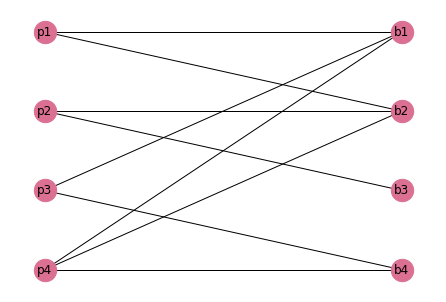

In [3]:
G = nx.Graph()
G.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])
pos = {'p1': [0,1.5], 'p2': [0,0.5], 'p3':[0,-0.5], 'p4': [0,-1.5], 'b1': [1,1.5], 'b2': [1,0.5], 'b3':[1,-0.5], 'b4': [1,-1.5]}
nx.draw(G, pos, node_color = 'palevioletred', node_size = 500,with_labels = True)

plt.savefig("ex20.svg")

It's immediatly clear that the graph is bipartite with $V_0 =$ {$p_1,p_2,p_3,p_4$}, $V_1 =$ {$b_1,b_2,b_3,b_4$}.

A perfect matching is a subset of edges such that no two edges share a common node, in our case such that to every person is assigned a book.

To verify the perfect matching it's possible to exploit an analogy between maximal flows and perfect matching.

Given a simple bipartite graph $G=(V,E)$ , consider the directed capacitated graph $G1$, with node set $V \cup o \cup d$, and edge set constructed as follows:
- for every node $p \in V_0$, add an edge (o,p), with capacity 1;
- for every node $b \in V_1$, add an edge (b,d), with capacity 1;
- for every undirected edge $(i,j)$ in $G$, add a directed edge $(i,j)$ in $G1$ with capacity 1.

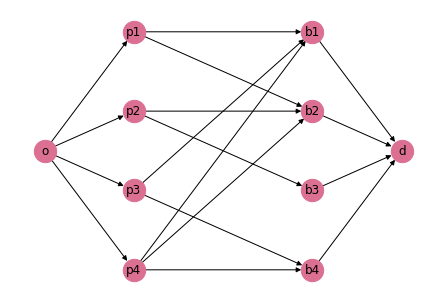

In [4]:
G1 = nx.DiGraph()
G1.add_edges_from([('o','p1'),('o','p2'),('o','p3'),('o','p4'),('b1','d'),('b2','d'),('b3','d'),('b4','d'),('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4'),])
pos = { 'o': [-1, 0], 'p1': [0,1.5], 'p2': [0,0.5], 'p3':[0,-0.5], 'p4': [0,-1.5], 'b1': [2,1.5], 'b2': [2,0.5], 'b3':[2,-0.5], 'b4': [2,-1.5], 'd': [3,0]} 
nx.draw(G1, pos = pos, node_color = 'palevioletred', node_size = 500, with_labels = True)

plt.savefig("ex21.svg")

In [5]:
G1.edges()

OutEdgeView([('o', 'p1'), ('o', 'p2'), ('o', 'p3'), ('o', 'p4'), ('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4'), ('b1', 'd'), ('b2', 'd'), ('b3', 'd'), ('b4', 'd')])

In [6]:
def set_capacities(G1, c):
    for i, edge in enumerate(G1.edges):
        G1[edge[0]][edge[1]]['capacity'] = c[i]

In [7]:
cap = np.ones(len(G1.edges))
set_capacities(G1,cap)

In [8]:
max_flow = nx.algorithms.flow.maximum_flow(G1,"o","d")
print(max_flow)

(4.0, {'o': {'p1': 1.0, 'p2': 1.0, 'p3': 1.0, 'p4': 1.0}, 'p1': {'b1': 0, 'b2': 1.0}, 'p2': {'b2': 0, 'b3': 1.0}, 'p3': {'b1': 1.0, 'b4': 0}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1.0}, 'b1': {'d': 1.0}, 'd': {}, 'b2': {'d': 1.0}, 'b3': {'d': 1.0}, 'b4': {'d': 1.0}})


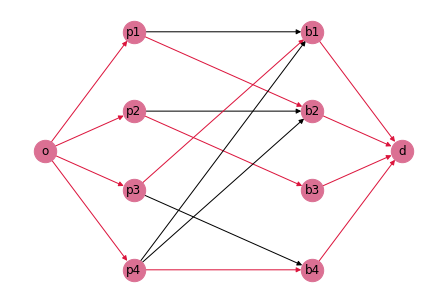

In [9]:
color_list = ['crimson','crimson','crimson','crimson','black','crimson','black','crimson','crimson','black','black','black','crimson','crimson','crimson','crimson','crimson']
nx.draw(G1, pos = pos, edge_color = color_list, node_color = 'palevioletred', node_size = 500, with_labels = True)

plt.savefig("ex22.svg")


 In particular, a $V_0$-perfect matching on $G$ exists if and only if it there exists a flow with throughput $|V_0|$ on the network $G1$

The maximum flow is equal to $V_0$, and this confirm that a perfect matching for $V_0$ exist

**Question b**

In [10]:
def set_capacities(G1, c):
    for i, edge in enumerate(G1.edges):
        G1[edge[0]][edge[1]]['capacity'] = c[i]

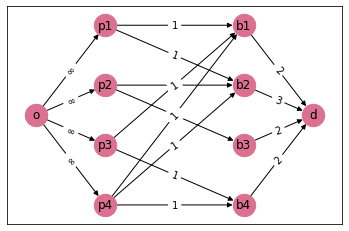

In [11]:
set_capacities(G1,cap)
G1['b1']['d']['capacity'] += 1
G1['b2']['d']['capacity'] += 2
G1['b3']['d']['capacity'] += 1
G1['b4']['d']['capacity'] += 1
G1['o']['p1']['capacity'] = float('inf')
G1['o']['p2']['capacity'] = float('inf')
G1['o']['p3']['capacity'] = float('inf')
G1['o']['p4']['capacity'] = float('inf')
nx.draw_networkx_edge_labels(G1,pos,edge_labels={('o','p1'): '$\infty$' , ('o', 'p2'): '$\infty$', ('o', 'p3'): '$\infty$', ('o', 'p4'): '$\infty$', ('p1', 'b1'): '1', ('p1', 'b2'): '1', ('p2', 'b2'): '1', ('p2', 'b3'): '1', ('p3', 'b1'): '1', ('p3', 'b4'): '1', ('p4', 'b1'): '1', ('p4', 'b2'): '1', ('p4', 'b4'): '1', ('b1', 'd'): '2', ('b2', 'd'): '3' , ('b3', 'd'): '2', ('b4', 'd'): '2'},font_color='black')
nx.draw_networkx(G1,pos, node_color = 'palevioletred', node_size = 500, with_labels = True)
plt.savefig("ex23.svg")



In [12]:
max_flow, set_a = nx.algorithms.flow.maximum_flow(G1, 'o', 'd')
print(max_flow)

8.0


When we add books' copies, we assume that the outgoing capacities through $d$ are, respectively,$\quad(2,3,2,2)$

We add an infinite capacity on edges from the origin $o$ because the number of books for each person is arbitrary. 

We found the maximum flow is now 8, that is the number of possible matchings, the number of books that can be assigned in total, 2 per person.

In [13]:
nx.minimum_cut(G1, 'o', 'd')

(8.0, ({'b1', 'b2', 'b4', 'o', 'p1', 'p2', 'p3', 'p4'}, {'b3', 'd'}))

**Question c**

To maximize the sells, it's important to select the book who has still copies avaiable.
Calculating the minimun cut, it's visible that b3 is not included in the cut, so this book still has copies.
Now to find out the book to swap with $b3$, I compute the difference between edges's flow and edges's capacity


In [14]:
f_set_a = format_dict(set_a)
f_set_cap = format_dict(G1.edges._adjdict)
res = {key: f_set_cap[key] - f_set_a.get(key, 0)
                       for key in f_set_cap.keys()}
res

{('o', 'p1'): inf,
 ('o', 'p2'): inf,
 ('o', 'p3'): inf,
 ('o', 'p4'): inf,
 ('p1', 'b1'): 1.0,
 ('p1', 'b2'): 0.0,
 ('p2', 'b2'): 0.0,
 ('p2', 'b3'): 0.0,
 ('p3', 'b1'): 0.0,
 ('p3', 'b4'): 0.0,
 ('p4', 'b1'): 0.0,
 ('p4', 'b2'): 0.0,
 ('p4', 'b4'): 0.0,
 ('b1', 'd'): 0.0,
 ('b2', 'd'): 0.0,
 ('b3', 'd'): 1.0,
 ('b4', 'd'): 0.0}

Computing the difference between edges's flow and edges's capacityhe I found that edge $p_1-b_1$ has 1 capacity left, so the problem can be optimized buying a book $b_3$ and and selling a book $b_1$